In [2]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [3]:
from google.colab import drive #to import the google drive data

In [4]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/Heirarchical-clustering" 

/content/drive/My Drive/Colab Notebooks/Heirarchical-clustering


In [6]:
dataset = pd.read_csv("Instagram visits clustering.csv")

In [7]:
dataset

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


In [9]:
X = dataset.iloc[:,1:3].values

In [10]:
X

array([[ 63.        ,  24.05070845],
       [ 61.        ,  25.22329005],
       [104.        ,  18.52824526],
       ...,
       [100.        ,  84.99948736],
       [ 87.        ,  20.53080557],
       [ 34.        ,  76.38862194]])

In [11]:
X.shape

(2600, 2)

In [12]:
import scipy.cluster.hierarchy as sch

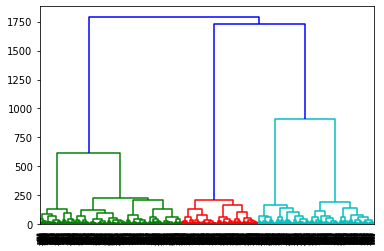

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc =  AgglomerativeClustering(n_clusters=5,linkage='ward')

In [16]:
y_hc = hc.fit_predict(X)

In [17]:
y_hc

array([4, 4, 0, ..., 2, 0, 3])

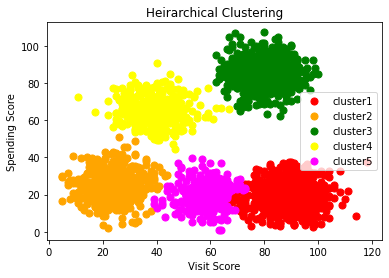

In [24]:
#visualize the Cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='orange',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='cluster5')
plt.title('Heirarchical Clustering')
plt.xlabel('Visit Score')
plt.ylabel('Spending Score')
plt.legend()  

In [25]:
#Verifying with the K Means


In [26]:
from sklearn.cluster import KMeans

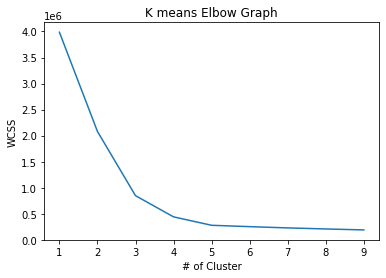

In [27]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

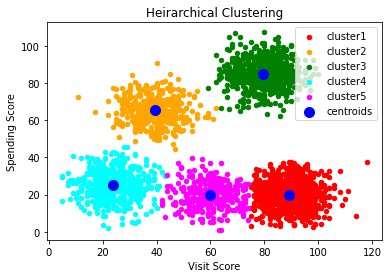

In [30]:
#visualize the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Visit Score')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()